<a href="https://colab.research.google.com/github/keshavub20/tensorflow_nn/blob/main/human_horse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
!pwd
%cd /content/
%mkdir /content/ai
%cd /content/ai
!wget --no-check-certificate https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip -O /content/ai/horse_human.zip

/content
/content
mkdir: cannot create directory ‘/content/ai’: File exists
/content/ai
--2021-01-04 00:01:37--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 74.125.195.128, 74.125.142.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/content/ai/horse_human.zip’

/content/ai/horse_h 100%[===================>] 142.65M   204MB/s    in 0.7s    

2021-01-04 00:01:38 (204 MB/s) - ‘/content/ai/horse_human.zip’ saved [149574867/149574867]



**Create directories for test and Validation by extracting the zip file**


In [3]:
 import zipfile
local_zip='/content/ai/horse_human.zip'
zip_ref=zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/content/ai/horse_human')
zip_ref.close()

**print 6 images of Humans and 6 of Horses**

['horse13-3.png', 'horse18-1.png', 'horse39-5.png', 'horse40-0.png', 'horse01-6.png', 'horse29-6.png']
['human05-08.png', 'human07-19.png', 'human10-03.png', 'human16-28.png', 'human12-11.png', 'human07-09.png']


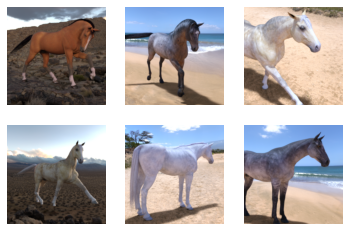

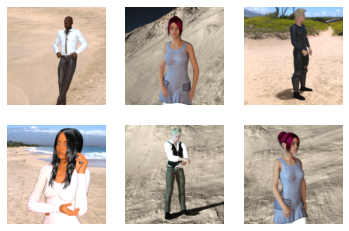

In [16]:
import os
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
train_horse_dir=os.path.join('/content/ai/horse_human/horses')
train_human_dir=os.path.join('/content/ai/horse_human/humans')
horse_names=os.listdir(train_horse_dir)[0:6]
human_names=os.listdir(train_human_dir)[0:6]
print(horse_names)
print(human_names)
i=1
for horse in horse_names:
  sp=plt.subplot(2,3,i)
  sp.axis('off')
  horse_image=mpimg.imread(os.path.join(train_horse_dir,horse))
  plt.imshow(horse_image)
  i=i+1
plt.show()
i=1
for human in human_names:
  sp=plt.subplot(2,3,i)
  sp.axis('off')
  human_image=mpimg.imread(os.path.join(train_human_dir,human))
  plt.imshow(human_image)
  i=i+1
plt.show()


**Create  imageDataGenerator**

In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
model=tf.keras.models.Sequential([
                           tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(300,300,3)),
                           tf.keras.layers.MaxPooling2D(2,2),
                           tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                           tf.keras.layers.MaxPooling2D(2,2),
                           tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                           tf.keras.layers.MaxPooling2D(2,2),
                           tf.keras.layers.Flatten(),
                           tf.keras.layers.Dense(64,activation='relu'),
                           tf.keras.layers.Dense(1,activation='sigmoid')
                           ])
model.compile(loss='binary_crossentropy',optimizer=RMSprop(lr=0.001),metrics=['accuracy'])


train_gen=ImageDataGenerator(rescale=1/255.0)
train_generator=train_gen.flow_from_directory(
    '/content/ai/horse_human',
    target_size=(300,300),
    batch_size=10,
    class_mode='binary'
)

model.fit_generator(train_generator,epochs=15,steps_per_epoch=8,verbose=1)


Found 1027 images belonging to 2 classes.


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
8/8 [==============================] - 8s 791ms/step - loss: 0.9617 - accuracy: 0.5951
Epoch 2/15
8/8 [==============================] - 7s 804ms/step - loss: 0.7755 - accuracy: 0.5234
Epoch 3/15
8/8 [==============================] - 7s 801ms/step - loss: 1.3199 - accuracy: 0.6152
Epoch 4/15
8/8 [==============================] - 6s 786ms/step - loss: 0.3951 - accuracy: 0.8961
Epoch 5/15
8/8 [==============================] - 6s 755ms/step - loss: 0.9696 - accuracy: 0.7783
Epoch 6/15
8/8 [==============================] - 6s 756ms/step - loss: 0.2621 - accuracy: 0.9072
Epoch 7/15
8/8 [==============================] - 6s 782ms/step - loss: 0.3459 - accuracy: 0.9274
Epoch 8/15
8/8 [==============================] - 6s 774ms/step - loss: 0.3494 - accuracy: 0.8614
Epoch 9/15
8/8 [==============================] - 6s 784ms/step - loss: 0.1653 - accuracy: 0.9620
Epoch 10/15
8/8 [==============================] - 6s 782ms/step - loss: 0.3006 - accuracy: 0.8734
Epoch 11/15
8/8 [==

**Run the model**

Saving hum.webp to hum.webp
is a human


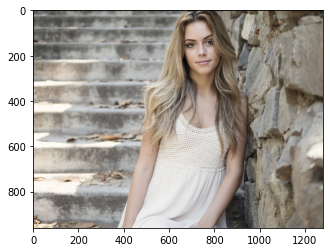

In [38]:
from google.colab import files
from matplotlib import image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import os
from tensorflow.keras.preprocessing import image
uploaded=files.upload()
path='/content/ai/uploads/'
for upd in uploaded.keys():
  im_path='/content/ai/'+upd
  up_image=mpimg.imread(os.path.join(im_path))
  plt.imshow(up_image)
  pr_img=image.load_img(im_path,target_size=(300,300))
  im_arr=image.img_to_array(pr_img)
  np_arr=np.expand_dims(im_arr,0)
  im_arr_stack=np.vstack([np_arr])
  classes=model.predict(im_arr_stack)
  if classes[0]>0.5:
    print("is a human")
  else:
    print(" is a horse")





